# Simple Linear Regression Model

## Importing Libraries
Pandas
Numpy
Matplotlib
Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the dataset using pandas

In [2]:
df=pd.read_csv("Dataset\data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ROG\AppData\Local\Temp\ipykernel_16048\187933260.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv("Dataset\data.csv")


In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


##  Checking for null values

In [4]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

x    0
y    0
dtype: int64

## Plotting in scatter plotter

Text(0, 0.5, 'Y')

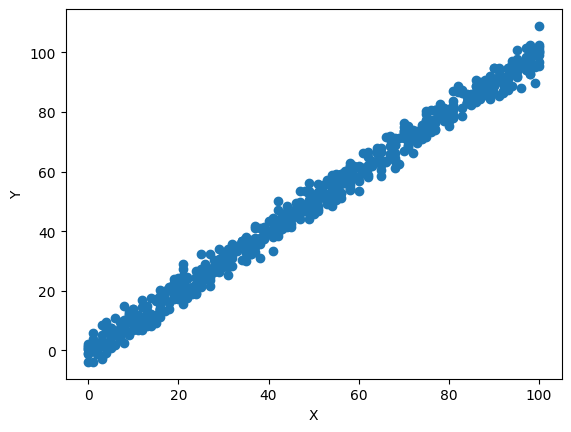

In [7]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X')
plt.ylabel('Y')

## Calculating Correlation

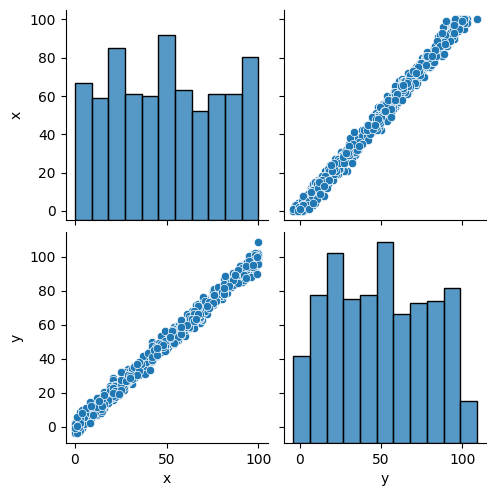

In [8]:
df.corr()
sns.pairplot(df)

## Seperating dependent variables and independent variables

In [9]:
X= df[['x']]
Y = df['y']


## Train test Spliting

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24,random_state=42)

In [11]:
print("The shape of x_train is",x_train.shape[0],"rows")
print("The shape of y_train is",y_train.shape[0],"rows")
print("The shape of x_test is",x_test.shape[0],"rows")
print("The shape of y_test is",y_test.shape[0],"rows")

The shape of x_train is 531 rows
The shape of y_train is 531 rows
The shape of x_test is 168 rows
The shape of y_test is 168 rows


## Standardisation

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_Train=scaler.fit_transform(x_train)
X_Test=scaler.transform(x_test)

## Importing and fitting Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(n_jobs=-1)

In [15]:
model.fit(X_Train,y_train)

LinearRegression(n_jobs=-1)

In [16]:
print("Coeff of the model is:",model.coef_)
print("Intercept of the model is:",model.intercept_)

Coeff of the model is: [28.74470692]
Intercept of the model is: 51.163003552787195


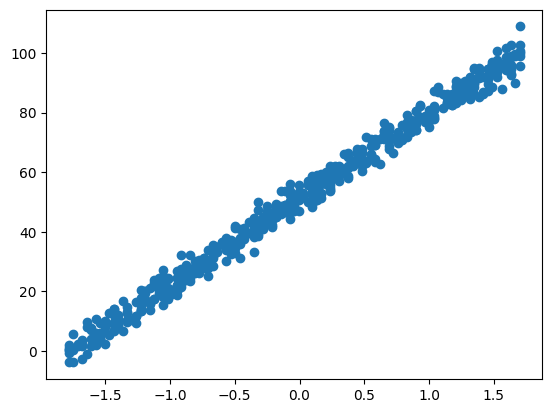

In [17]:
plt.scatter(X_Train,y_train)

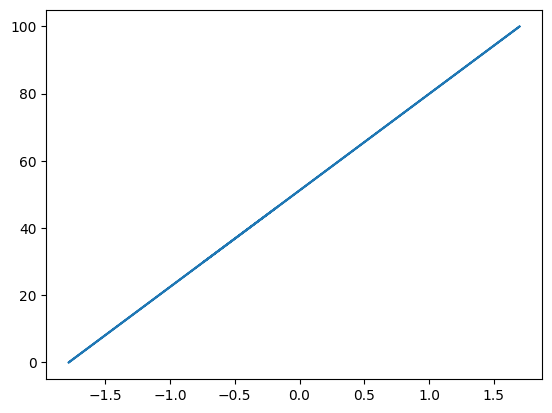

In [24]:
plt.plot(X_Train,model.predict(X_Train))

## Predicting

In [19]:
y_pred=model.predict(X_Test)

## Performance Metrics

In [20]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Square Error of the model is:",mse)
print("Mean Absolute Error of the model is:",mae)
print("Root Mean Square Error of the model is:",rmse)

Mean Square Error of the model is: 7.649309041119528
Mean Absolute Error of the model is: 2.1995720544693387
Root Mean Square Error of the model is: 2.765738426012035


In [21]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
print("r2_score of the model is:",r2score)

r2_score of the model is: 0.991148603454249


In [22]:
adjusted_r2_score=1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_Test.shape[1]-1)
print ("adjusted_r2_score of the model is:",adjusted_r2_score)

adjusted_r2_score of the model is: 0.9910952817883107


In [28]:
import statsmodels.api as sm
ols_model=sm.OLS(y_train,x_train).fit()

In [29]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.299e+05
Date:                Mon, 29 Jul 2024   Prob (F-statistic):                        0.00
Time:                        01:11:40   Log-Likelihood:                         -1303.5
No. Observations:                 531   AIC:                                      2609.
Df Residuals:                     530   BIC:                                      2613.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.9995      0.002    479.478      0.000       0.995       1.004
==============================================================================
Omnibus:                        0.131   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.138
Skew:                           0.038   Prob(JB):                        0.933
Kurtosis:                       2.977   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""